### Graphs Function


### Table of Contents
1  Problem Statement
<br/>2  Improvisation
<br/>3  Results

#### 1) Problem Statement

<br/> This project aims is to make automatic **univariate graphs** for the provided dataset.
<br/> Numerical data -> Histogram and Boxplot
<br/> Categorical data -> Barplot


#### 2)  Improvisation

<br/>1. The file has been imported and stored therefore we can call it from the libraries whenever there is a need.
<br/>2. Missing values are imputed if the user would want it.


#### 3)  Results
<br/> Based on the user preference it either would impute missing values or wont and would plot the graphs and save it in the current directory.

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer

class graph:

    def graphs(data, column=None, directory=os.getcwd()):
        
        
        dir=os.getcwd() # to reassign the directory path at the end of the function
        if data in os.listdir(os.getcwd()):
            dataframe = pd.read_csv(data)
        
        col = []
        if column==None: 
            col = list(dataframe.columns)
    
    #if single column is specified
        elif type(column) is str:
            col.append(column)
        
    #if list of columns are specified
        elif type(column) is list:
            for c in column:
                col.append(c)
        if not os.path.exists('Output1'):
            os.mkdir('Output1')
            os.chdir('Output1')
        
        else:
            os.chdir(directory+'/Output1') 
                 
                        
    #Segregating Numerical and Categorical data
    
        numerical_data = []
        categorical_data = []
    
        col_datatype = dataframe.dtypes
        for val in col:
            if 'object' in str(col_datatype[val]):
                categorical_data.append(val)
         
        #if float or int variables have limited/finite values putting them in categorical variables
            if 'float' in str(col_datatype[val]):
                if len(list(pd.Categorical(dataframe[val]).categories))<15:
                    categorical_data.append(val)
                else:
                    numerical_data.append(val)
            
            elif 'int' in str(col_datatype[val]):
                if len(list(pd.Categorical(dataframe[val]).categories))<15:
                    categorical_data.append(val)
                else:
                    numerical_data.append(val)
              
        print('Numerical Data :',numerical_data)
        print('\nCategorical Data : ',categorical_data)
        
        
        #imputing missing values for the variables.
        if np.sum(dataframe.isnull().sum())>0:
            print("\nYou have following number of missing values : ")
            print(dataframe.isnull().sum())
            print("\nDo you want to impute missing values.")
            n= input("Kindly input 'y' for YES or 'n' for NO : ")
            if n == "y" or n=='Y':               
                mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
                mean_imputer = mean_imputer.fit(dataframe.loc[:,numerical_data])
                dataframe.loc[:,numerical_data] = mean_imputer.transform(dataframe.loc[:,numerical_data].values)
                print('Missing value Index after imputation for Numerical Data :')
                print(dataframe.loc[:,numerical_data].isnull().sum())
                
                mode_imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
                mode_imputer = mode_imputer.fit(dataframe.loc[:,categorical_data])
                dataframe.loc[:,categorical_data] = mode_imputer.transform(dataframe.loc[:,categorical_data].values)
                print('Missing value Index after imputation for Categorical Data :')
                print(dataframe.loc[:,categorical_data].isnull().sum())
                
                
            elif n=="n" or n=='N':
                pass
         
        else:
            print('\nYou don\'t have missing values in your dataset')
          
        #Plotting the univariate graphs
        print('Histograms and Box-plots for numerical data :')
        for num in numerical_data:
            #Plot Histogram for numerical data
            plt.hist(dataframe[num],color='lavender',edgecolor='purple')
            plt.xlabel(num)
            #plt.ylabel()
            plt.savefig('Histogram of '+num+'.png')
            plt.show()
            #plt.clf()

            #Plot Boxplot for numerical data
            plt.boxplot(dataframe[num],notch=True,vert=False)
            plt.xlabel(num)
            plt.savefig('Boxplot of '+num+'.png')
            plt.show()
        #plt.clf()
    
        print('Barplots for Categorical data :')
        for cat in categorical_data:
        #plt.bar(cat,dataframe[cat].value_counts())
            dataframe[cat].value_counts().plot(kind='bar',color='lavender',edgecolor='purple')
            plt.xlabel(cat)
            plt.savefig('Barplot of '+cat+'.png')
            plt.show()
        #plt.clf()
        
        #Plotting heatmaps for all numerical data
        print('Heatmap of Numrical Variables.png')
        plt.figure(figsize=(12,8))
        sb.set(font_scale=1.4)
        sb.heatmap(dataframe[numerical_data].corr(), annot= True, cmap = "Purples")
        plt.savefig('Heatmap of Numrical Variables.png')
        plt.show()

Numerical Data : ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

Categorical Data :  ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

You have following number of missing values : 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Do you want to impute missing values.
Kindly input 'y' for YES or 'n' for NO : y


C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Missing value Index after imputation for Numerical Data :
age           0
cigsPerDay    0
totChol       0
sysBP         0
diaBP         0
BMI           0
heartRate     0
glucose       0
dtype: int64
Missing value Index after imputation for Categorical Data :
male               0
education          0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
TenYearCHD         0
dtype: int64
Histograms and Box-plots for numerical data :


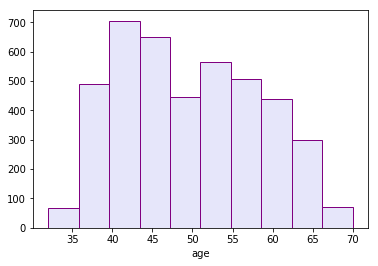

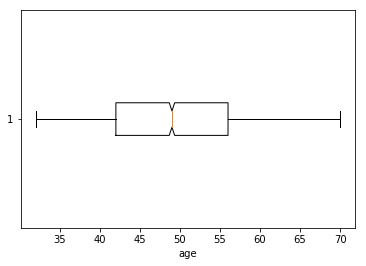

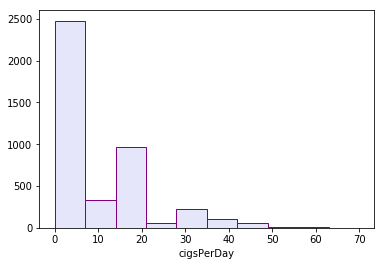

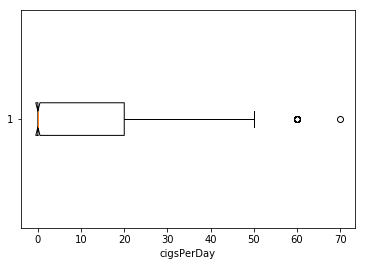

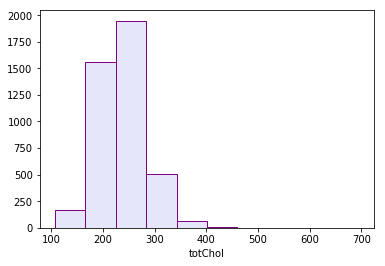

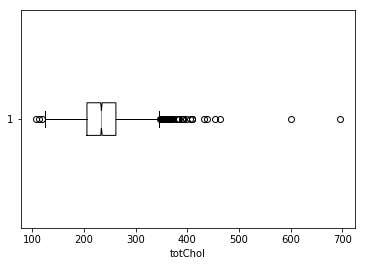

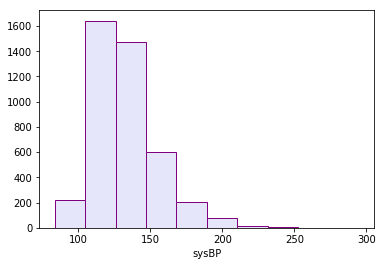

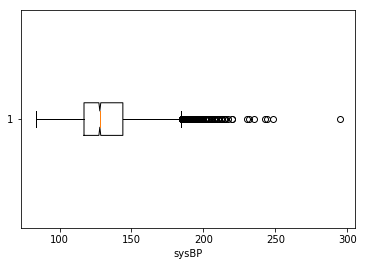

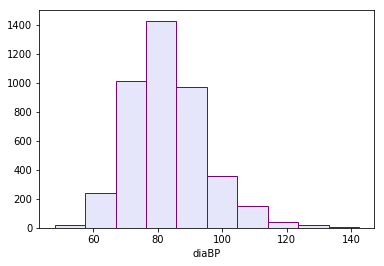

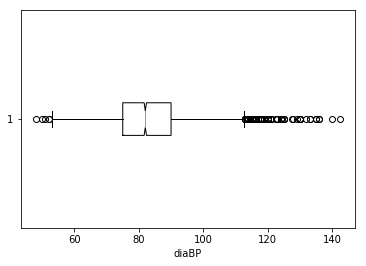

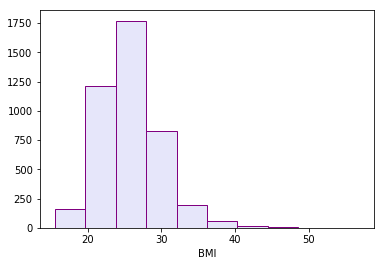

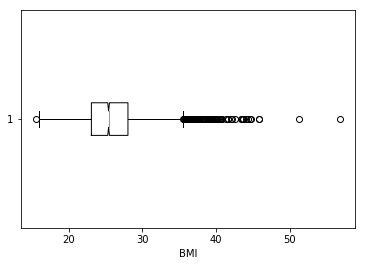

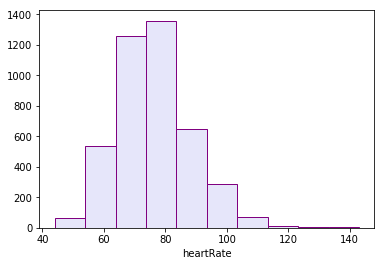

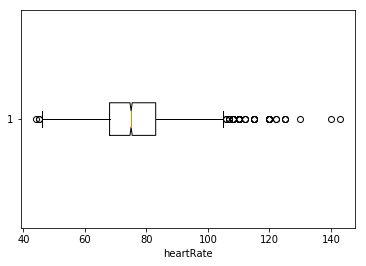

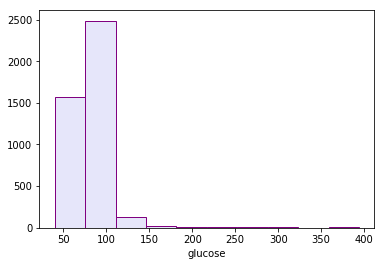

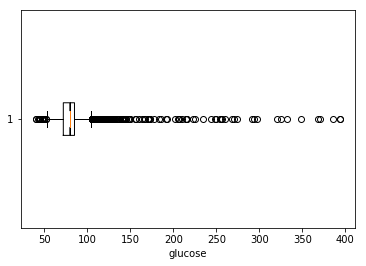

Barplots for Categorical data :


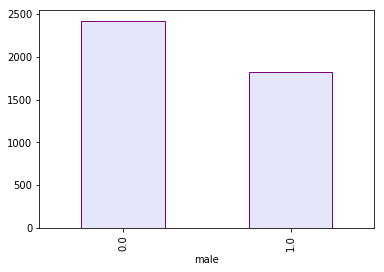

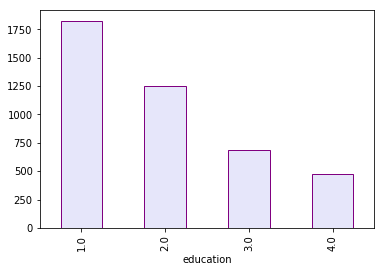

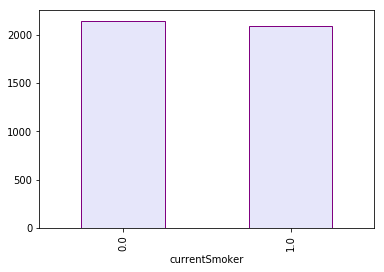

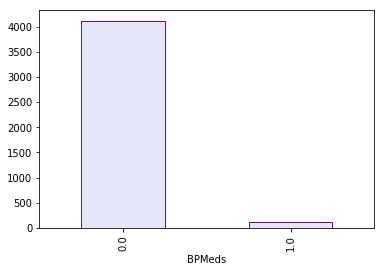

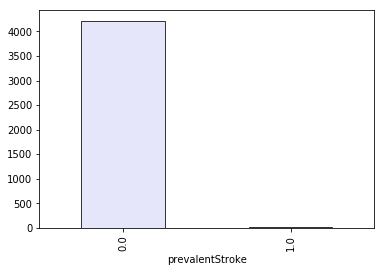

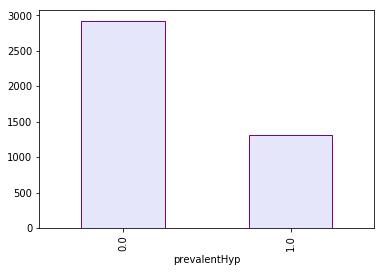

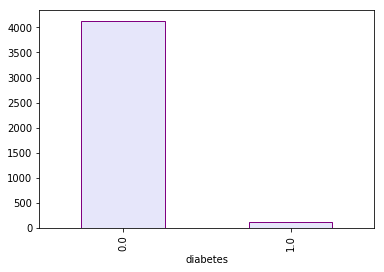

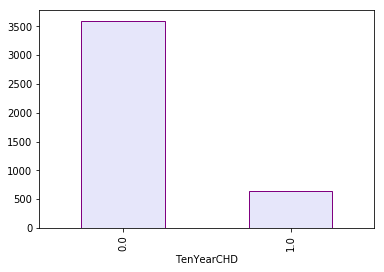

Heatmap of Numrical Variables.png


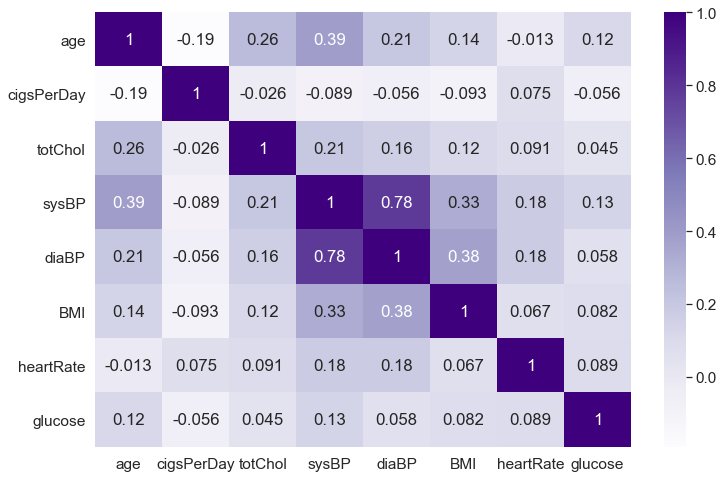

In [6]:
graph.graphs("framingham.csv")

In [5]:
os.getcwd()
os.chdir('C:\\Users\\pooja\\Desktop\\PYTHON')